In [1]:
# Data Source: 
# https://github.com/LearnDataSci/article-resources/tree/master/Housing%20Price%20Index%20Regression

# Import the data
import pandas as pd

housing_price_index = pd.read_csv('datasets/lin_reg/monthly-hpi.csv')
unemployment = pd.read_csv('datasets/lin_reg/unemployment-macro.csv')
federal_funds = pd.read_csv('datasets/lin_reg/fed_funds.csv')
shiller = pd.read_csv('datasets/lin_reg/shiller.csv')
gross_domestic_product = pd.read_csv('datasets/lin_reg/gdp.csv')

In [6]:
# merge the data
df = shiller.merge(housing_price_index, on='date')\
                .merge(unemployment, on='date')\
                .merge(federal_funds, on='date')\
                .merge(gross_domestic_product, on='date')

In [28]:
df.describe()

,sp500,consumer_price_index,long_interest_rate,housing_price_index,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,federal_funds_rate,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
count,23.000000,23.000000,23.00000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,1697.955652,232.821739,2.26913,204.955652,13.004348,5602.521739,2317.173913,7088.217391,8.495652,52.917391,0.145217,5914.082609,63.265217,198.421739,15795.756522
std,322.596751,5.405947,0.54516,19.364036,2.267052,1801.301143,294.338187,248.798742,1.316496,4.059854,0.093121,176.572817,0.561337,7.786875,571.226411
min,1207.220000,220.220000,1.50000,179.130000,9.700000,3175.000000,1715.000000,6816.000000,6.500000,47.600000,0.070000,5745.400000,62.500000,182.600000,14881.300000
25%,1373.105000,229.595000,1.89500,187.840000,11.050000,3912.000000,2137.500000,6895.500000,7.500000,49.200000,0.090000,5773.600000,62.800000,192.350000,15371.600000
50%,1720.030000,233.600000,2.09000,205.440000,13.600000,5807.000000,2347.000000,7007.000000,8.200000,53.600000,0.120000,5841.400000,62.900000,202.500000,15747.000000
75%,1998.955000,237.250000,2.60000,218.645000,14.700000,7027.500000,2497.500000,7308.000000,9.700000,55.500000,0.155000,5970.850000,63.700000,203.600000,16321.600000
max,2148.900000,240.650000,3.46000,241.590000,16.200000,8393.000000,2809.000000,7577.000000,10.900000,60.100000,0.390000,6307.500000,64.200000,208.300000,16727.000000


In [7]:
df.head()

,date,sp500,consumer_price_index,long_interest_rate,housing_price_index,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,federal_funds_rate,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
0,2011-01-01,1282.62,220.22,3.39,181.35,16.2,8393,2800,6816,6.5,60.1,0.17,5766.7,64.2,192.7,14881.3
1,2011-04-01,1331.51,224.91,3.46,180.80,16.1,8016,2466,6823,6.8,59.4,0.10,5870.8,64.2,203.1,14989.6
2,2011-07-01,1325.19,225.92,3.00,184.25,15.9,8177,2785,6850,6.8,59.2,0.07,5802.6,64.0,204.6,15021.1
3,2011-10-01,1207.22,226.42,2.15,181.51,15.8,7802,2555,6917,8.0,57.9,0.07,5812.9,64.1,201.1,15190.3
4,2012-01-01,1300.58,226.66,1.97,179.13,15.2,7433,2809,7022,7.4,57.1,0.08,5765.7,63.7,200.7,15291.0


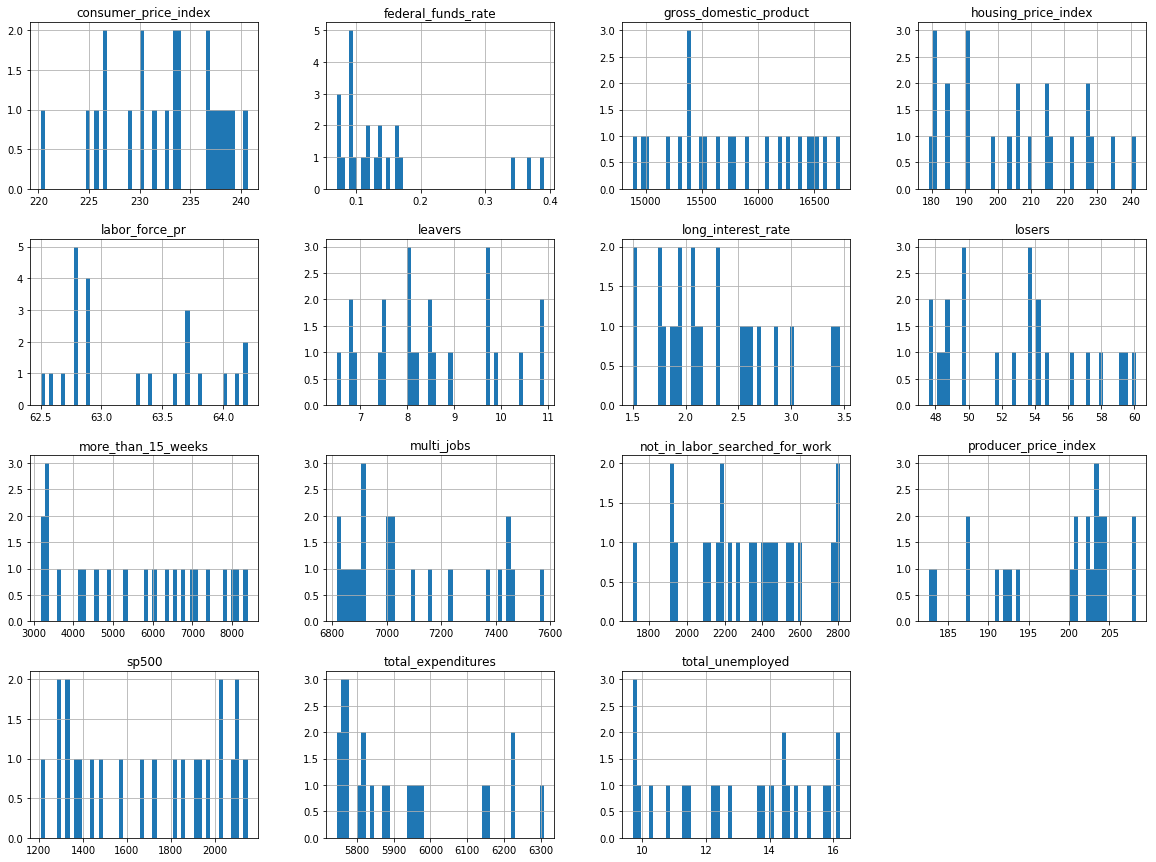

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

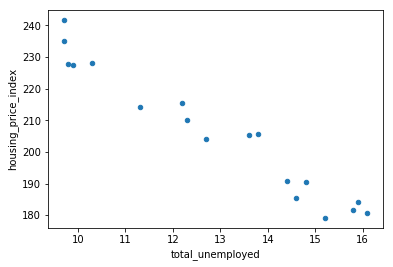

In [26]:
hpi = train_set.copy()
hpi.plot(kind="scatter", x="total_unemployed", y="housing_price_index")

In [24]:
# Pearson's r: correlation coefficient between every pair of attributes
corr_matrix = hpi.corr()
corr_matrix["housing_price_index"].sort_values(ascending=False)

housing_price_index               1.000000
gross_domestic_product            0.979993
sp500                             0.958636
consumer_price_index              0.951964
leavers                           0.903704
total_expenditures                0.883244
multi_jobs                        0.837061
federal_funds_rate                0.655638
long_interest_rate               -0.321747
producer_price_index             -0.704424
labor_force_pr                   -0.891661
not_in_labor_searched_for_work   -0.896459
losers                           -0.900134
total_unemployed                 -0.973341
more_than_15_weeks               -0.973944
Name: housing_price_index, dtype: float64

C:\Users\Sid\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012CC7CC0>,
      dtype=object)

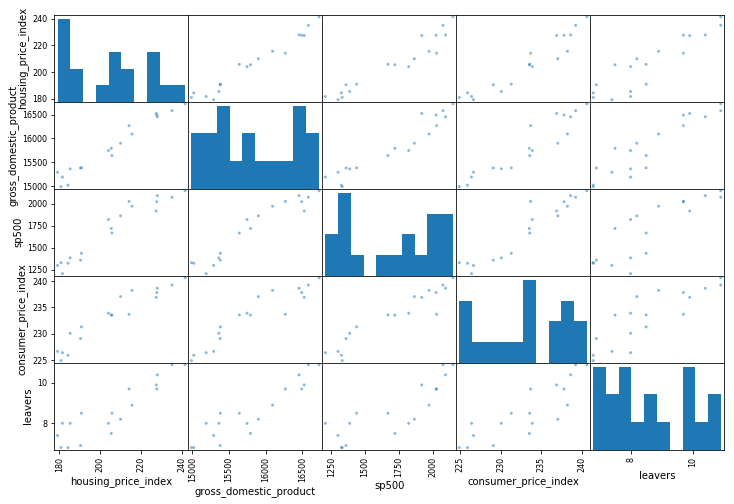

In [27]:
# Using pandas scatter_matrix func to plot every numerical attribute with every other
from pandas.tools.plotting import scatter_matrix

attributes = ["housing_price_index", "gross_domestic_product", "sp500", "consumer_price_index", "leavers"]
scatter_matrix(hpi[attributes], figsize=(12,8))

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
hpi_labels = hpi["housing_price_index"]
hpi_prepared = hpi.drop(["housing_price_index", "date"], axis=1)
lin_reg.fit(hpi_prepared, hpi_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
# Trying the model on some data
some_data_prepared = hpi_prepared.iloc[:5]
some_labels = hpi_labels.iloc[:5]
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [204.13445153 181.65352611 209.79400518 184.47491238 182.93251558]


In [33]:
print("Labels:", list(some_labels))

Labels: [204.04, 180.8, 210.0, 185.29, 184.25]


In [36]:
# Measure the regression model's RMSE
import numpy as np
from sklearn.metrics import mean_squared_error
hpi_predictions = lin_reg.predict(hpi_prepared)
lin_mse = mean_squared_error(hpi_labels, hpi_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.9214508391859999

In [39]:
# Print the scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [40]:
# Compute the cross_validation_scores for LinearRegression
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, hpi_prepared, hpi_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [11.95238588 12.05749998  2.81436996  6.37521929  4.18320866  4.58871275
  2.46579002  5.33199829  6.48882422  7.27768589]
Mean: 6.353569494376467
Standard deviation: 3.182198570035134


In [42]:
# Saving the model
import os
from sklearn.externals import joblib

models_path = os.path.join("models", "housing")

if not os.path.isdir(models_path):
    os.makedirs(models_path)

joblib.dump(lin_reg, os.path.join(models_path,"hpi_lin_reg.pkl"))

['models\\housing\\hpi_lin_reg.pkl']

In [43]:
# Evaluate on test
X_test_prepared = test_set.drop(["housing_price_index", "date"], axis=1)
y_test = test_set["housing_price_index"].copy()

final_predictions = lin_reg.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

4.1666815965411885